# Reading the data 

First let us glimpse the structure of the table to have it in mind.


In [2]:
#### Libraries to be used

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA

In [3]:
########### Reading the data
df = pd.read_excel('Accidentalidad_2016.xlsx', sheet_name='Accidentalidad_2016')
df.head()

,OBJECTID,X,Y,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_,CBML,TIPO_GEOCO,GRAVEDAD,BARRIO,COMUNA,DISENO
0,260034,-75.578357,6.213719,1520771,2016-01-29T00:00:00.000Z,06:50 AM,VIERNES,2016,Choque,CR 50 CL 8,CR 050 008 000 00000,1507,Malla vial,HERIDO,Campo Amor,Guayabal,Tramo de via
1,260035,-75.583264,6.248619,1520840,2016-01-29T00:00:00.000Z,10:55 AM,VIERNES,2016,Atropello,CL 44 CR 65,CL 044 065 000 00000,1103,Malla vial,HERIDO,Naranjal,Laureles Estadio,Tramo de via
2,260036,-75.562354,6.272500,1520825,2016-01-29T00:00:00.000Z,11:50 PM,VIERNES,2016,Otro,CR 51 CL 78,CR 051 078 000 00000,0415,Malla vial,HERIDO,Miranda,Aranjuez,Tramo de via
3,260037,-75.559304,6.248679,1520865,2016-01-29T00:00:00.000Z,05:00 AM,VIERNES,2016,Volcamiento,CL 54 CR 40,CL 054 040 000 00000,1016,Malla vial,HERIDO,Boston,La Candelaria,Tramo de via
4,260038,-75.573175,6.300416,1520828,2016-01-29T00:00:00.000Z,12:20 PM,VIERNES,2016,Choque,CR 74 CL 103,CR 074 103 000 00000,0604,Malla vial,HERIDO,Pedregal,Doce de Octubre,Tramo de via


# Analizando tipo y gravedad

Los dos primeros códigos para la generación de la grácias ilsutran la metodología general llevada a cabo por tanto en los procimos códicos que hacen los mismo se omiten comentatios. 

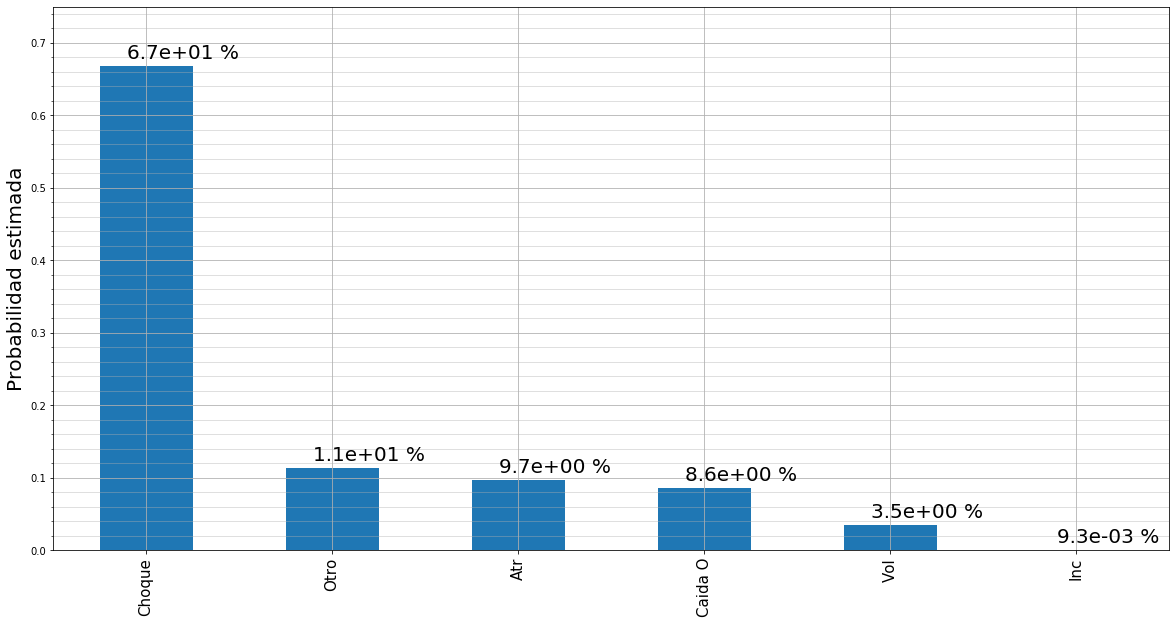

In [70]:
######### Fixing the types caida de ocupante y caida ocupante as the same and defining global valiues
df["CLASE"] = df["CLASE"].replace({'Caída de Ocupante':'Caida Ocupante'})
df["CLASE"] = df["CLASE"].replace({'Caida Ocupante':'Caida O'})
df["CLASE"] = df["CLASE"].replace({'Atropello':'Atr.'})
df["CLASE"] = df["CLASE"].replace({'Volcamiento':'Vol.'})
df["CLASE"] = df["CLASE"].replace({'Incendio':'Inc.'})
df["CLASE"] = df["CLASE"].replace({'SOLO DAÑOS':'S. DAÑOS'})


n_columns = len(df)

######### Defining some repetative routines
def grids(ax):  
    minor_ticks = np.linspace(0, 1, 51)
    major_ticks = np.linspace(0, 1, 11)

    ax.set_yticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=1)
    ax.set_ylabel("Probabilidad estimada", fontsize=20)    
    
###### Figure declaration
fig = plt.figure(figsize=(20,10))

## Calculating values
df1 = df['CLASE'].value_counts()/(n_columns) 

### Doing plot

ax = df1.plot(kind= "bar")
grids(ax)
df1 = df1*100

###### Vizualize the results for incendios
pd.options.display.float_format = '{:,.2e}%'.format

###### Set the percent values for better vizualization
ax.set_ylim([0,0.75])
for i in range( len(df1) ):
    ax.text(-0.1 + 1*i, df1[i]/100+0.01, "%.1e"%(df1[i])+' %' , fontsize=20)

## Set graph parameters
plt.rcParams["figure.figsize"] = [20, 10] ## Global change because do not work locally
plt.rc('xtick',labelsize=20) 
plt.savefig("Clase.png")



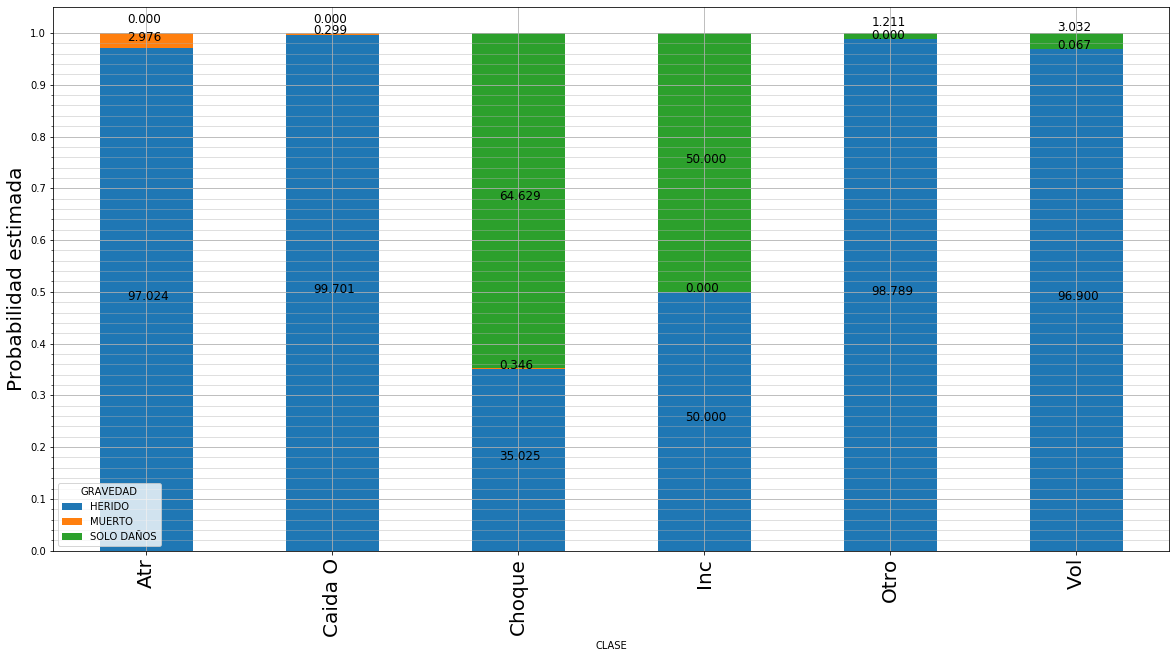

In [61]:
### Calculation of graph to vizualize the result of the conditional probabilities; given a type of event how will the 
##  person ends
df2 = df.groupby("CLASE")['GRAVEDAD'].value_counts().unstack(level=1)#.plot.bar(stacked=True)
df2 = df2.fillna(0.)
df2['sum'] = df2.iloc[0:,:].sum(axis=1)
df2 = df2.iloc[0:,:-1].div(df2['sum'],axis=0)


## Set graph parameters
plt.rcParams["figure.figsize"] = [20, 10] ## Global change because do not work locally
ax = df2.plot.bar(stacked=True)
grids(ax)


df2 = df2.iloc[0:,:]*100 
## sumatory done to ubicate numbers in an easy way in stacke bars
df2_copy = df2.iloc[0:,:].cumsum(axis = 1)
df2_copy.insert( 0,"null",[0]*len(df2) ) 

###### Set the percent values for better vizualization
for i in range( len(df2_copy) ):
    k = 0
    for j in range(3):
        if (j!=0):
            ##idea of cicle Put percent in the middle ; if is near another then put it over the last
            if ( (df2_copy.iloc[i][j+1]-df2_copy.iloc[i][j-1])/200<0.1 ):
                k+=1
                ax.text(-0.1 + 1*i, (df2_copy.iloc[i][j]+df2_copy.iloc[i][j+1])/200 + k*0.02 , "%.3f"%( df2.iloc[i][j] ) 
                        , fontsize=12)
            else:
                ax.text(-0.1 + 1*i, (df2_copy.iloc[i][j]+df2_copy.iloc[i][j+1])/200 + k*0.02 , "%.3f"%( df2.iloc[i][j] ) 
                        , fontsize=12)

        else:
            ax.text(-0.1 + 1*i, (df2_copy.iloc[i][j]+df2_copy.iloc[i][j+1])/200 + k*0.02 , "%.3f"%( df2.iloc[i][j] ) 
                    , fontsize=12)
df2


    
plt.savefig("clase_dada_gravedad.png")

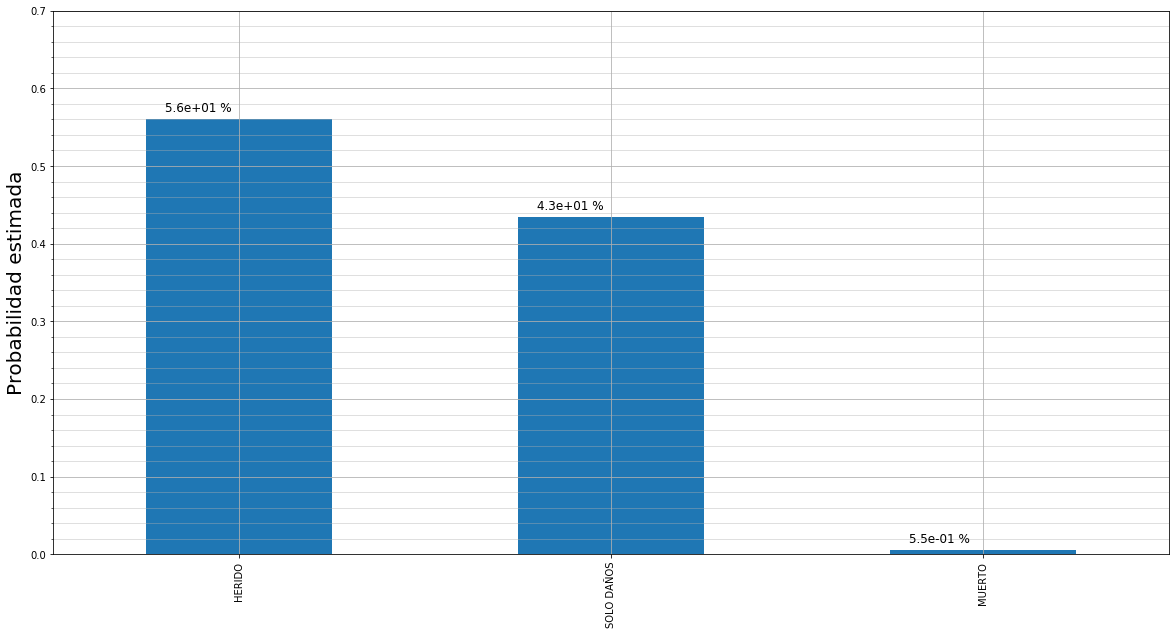

In [23]:
###### Figure declaration
fig = plt.figure(figsize=(20,10))

## Calculating values
df1 = df['GRAVEDAD'].value_counts()/(n_columns) 

### Doing plot
ax = df1.plot(kind= "bar")
grids(ax)
df1 = df1*100

###### Vizualize the results for incendios
pd.options.display.float_format = '{:,.2e}%'.format

###### Set the percent values for better vizualization
ax.set_ylim([0,0.7])
for i in range( len(df1) ):
    ax.text(-0.2 + 1*i, df1[i]/100+0.01, "%.1e"%(df1[i])+' %' , fontsize=12)
    
    

#plt.rcParams["figure.figsize"] = [20, 10] ## Global change because do not work locally
ax.set_ylabel("Probabilidad estimada", fontsize=20)    
plt.savefig("Gravedad.png")

CLASE,Atr,Caida O,Choque,Inc,Otro,Vol
GRAVEDAD,,,,,,
HERIDO,1.69e+01%,1.53e+01%,4.18e+01%,8.34e-03%,2.01e+01%,5.99e+00%
MUERTO,5.28e+01%,4.68e+00%,4.21e+01%,0.00e+00%,0.00e+00%,4.26e-01%
SOLO DAÑOS,0.00e+00%,0.00e+00%,9.94e+01%,1.07e-02%,3.17e-01%,2.42e-01%


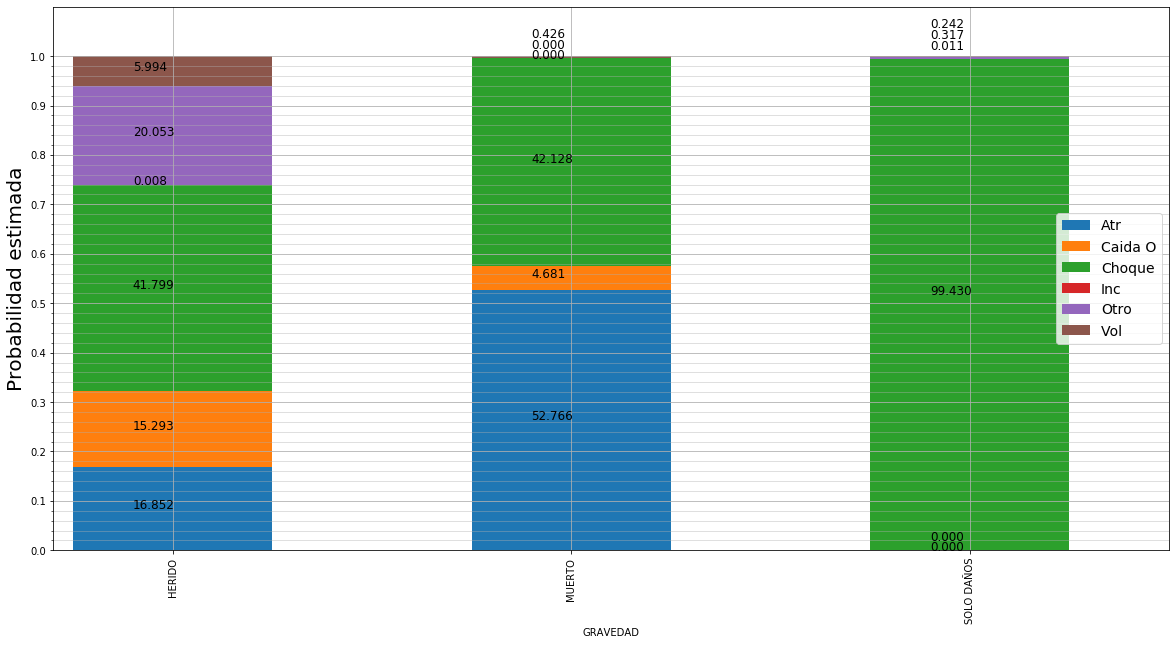

In [78]:
### Calculation of graph to vizualize the result of the conditional probabilities; given a type of event how will the 
##  person ends
df2 = df.groupby("GRAVEDAD")['CLASE'].value_counts().unstack(level=1)#.plot.bar(stacked=True)
df2 = df2.fillna(0.)
df2['sum'] = df2.iloc[0:,:].sum(axis=1)
df2 = df2.iloc[0:,:-1].div(df2['sum'],axis=0)


plt.rcParams["figure.figsize"] = [20, 10] ## Global change because do not work locally
ax = df2.plot.bar(stacked=True)
grids(ax)
ax.set_ylim([0,1.1])
ax.set_xlim([-0.3,2.5])

df2 = df2.iloc[0:,:]*100 
df2


## sumatory done to ubicate numbers in an easy way in stacke bars
df2_copy = df2.iloc[0:,:].cumsum(axis = 1)
df2_copy.insert( 0,"null",[0]*len(df2) ) 

#df2_copy['Volcamiento']['SOLO DAÑOS'] = 100.1
#df2_copy.__getitem__('Otro').__setitem__('SOLO DAÑOS', 99)
#df2_copy.__getitem__('Otro').__setitem__('SOLO DAÑOS', 93)
#df2_copy.iloc[2][-1] = df2_copy.iloc[2][-1] 

## Setting percent values
for i in range( len(df2_copy) ):
    k = 0
    for j in range(6):
        if (j!=0):
            if ( (df2_copy.iloc[i][j+1]-df2_copy.iloc[i][j-1])/200<0.1 ):
                k+=1
                ax.text(-0.1 + 1*i, (df2_copy.iloc[i][j]+df2_copy.iloc[i][j+1])/200 + k*0.02 , "%.3f"%( df2.iloc[i][j] ) 
                        , fontsize=12)
            else:
                ax.text(-0.1 + 1*i, (df2_copy.iloc[i][j]+df2_copy.iloc[i][j+1])/200 + k*0.02 , "%.3f"%( df2.iloc[i][j] ) 
                        , fontsize=12)

        else:
            ax.text(-0.1 + 1*i, (df2_copy.iloc[i][j]+df2_copy.iloc[i][j+1])/200 + k*0.02 , "%.3f"%( df2.iloc[i][j] ) 
                    , fontsize=12)

ax.legend(loc =7, fontsize=14)

plt.rc('xtick',labelsize=8)
plt.savefig("Tipo_dada_gravedad")         
df2
 

# Estudiando los accidentes por comuna

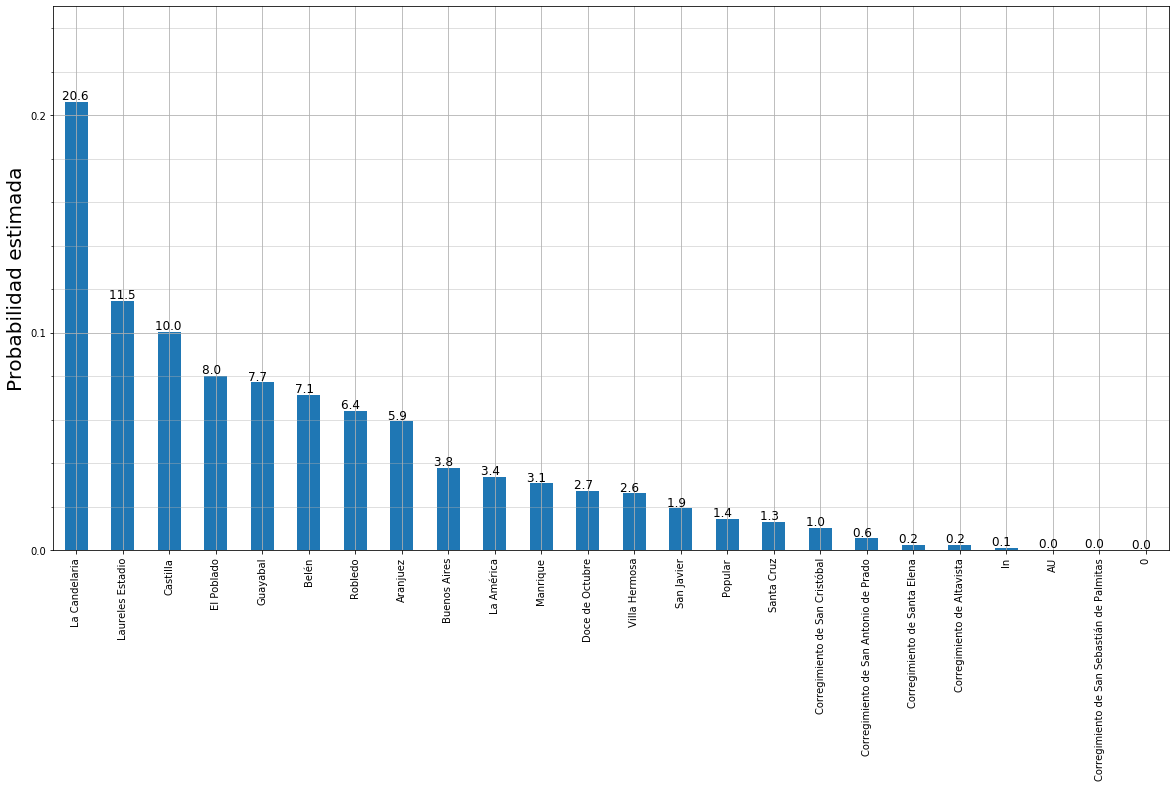

In [25]:
df["CLASE"] = df["CLASE"].replace({'Incendio':'Inc.'})

###### Figure declaration
fig = plt.figure(figsize=(20,10))

## Calculating values
df1 = df['COMUNA'].value_counts()/(n_columns) 

### Doing plot
ax = df1.plot(kind= "bar")
grids(ax)
df1 = df1*100

###### Vizualize the results for incendios
pd.options.display.float_format = '{:,.2e}%'.format

###### Set the percent values for better vizualization
ax.set_ylim([0,0.25])
for i in range( len(df1) ):
    ax.text(-0.3 + 1*i, df1[i]/100+0.001, "%.1f"%(df1[i])+' ' , fontsize=12)
    

ax.set_ylabel("Probabilidad estimada", fontsize=20)    
plt.savefig("Comuna.png")

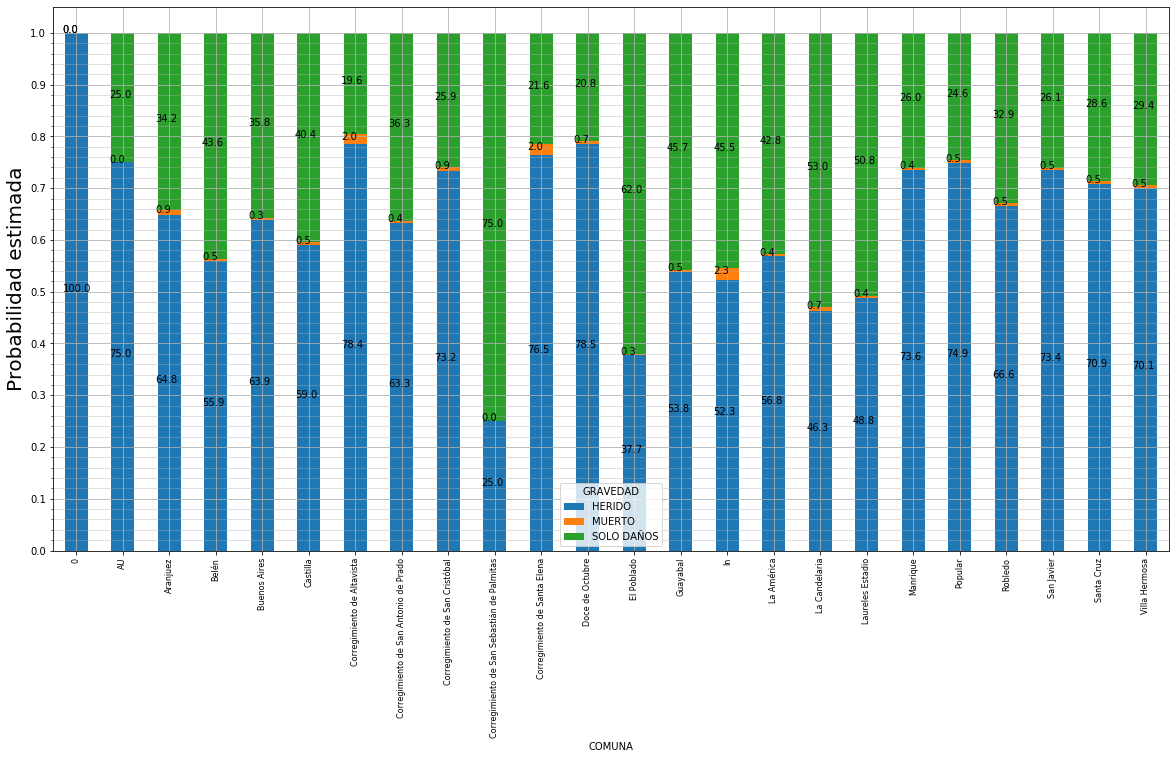

In [93]:
df3 = df.groupby("COMUNA")['GRAVEDAD'].value_counts().unstack(level=1)
df3 = df3.fillna(0.)
df3['sum'] = df3.iloc[0:,:].sum(axis=1)
df3 = df3.iloc[0:,:-1].div(df3['sum'],axis=0)

plt.rcParams["figure.figsize"] = [20, 10] ## Global change because do not work locally
ax = df3.plot.bar(stacked=True)
grids(ax)

df3 = df3.iloc[0:,:]*100 

df3_copy = df3.iloc[0:,:].cumsum(axis = 1)
df3_copy.insert( 0,"null",[0]*len(df3) ) 

## sting persent values
for i in range( len(df3_copy) ):
    for j in range(3):
        ax.text(-0.3 + 1*i, (df3_copy.iloc[i][j]+df3_copy.iloc[i][j+1])/200, "%.1f"%( df3.iloc[i][j] ) 
                , fontsize=10)

plt.savefig("comuna_gravedad.png")


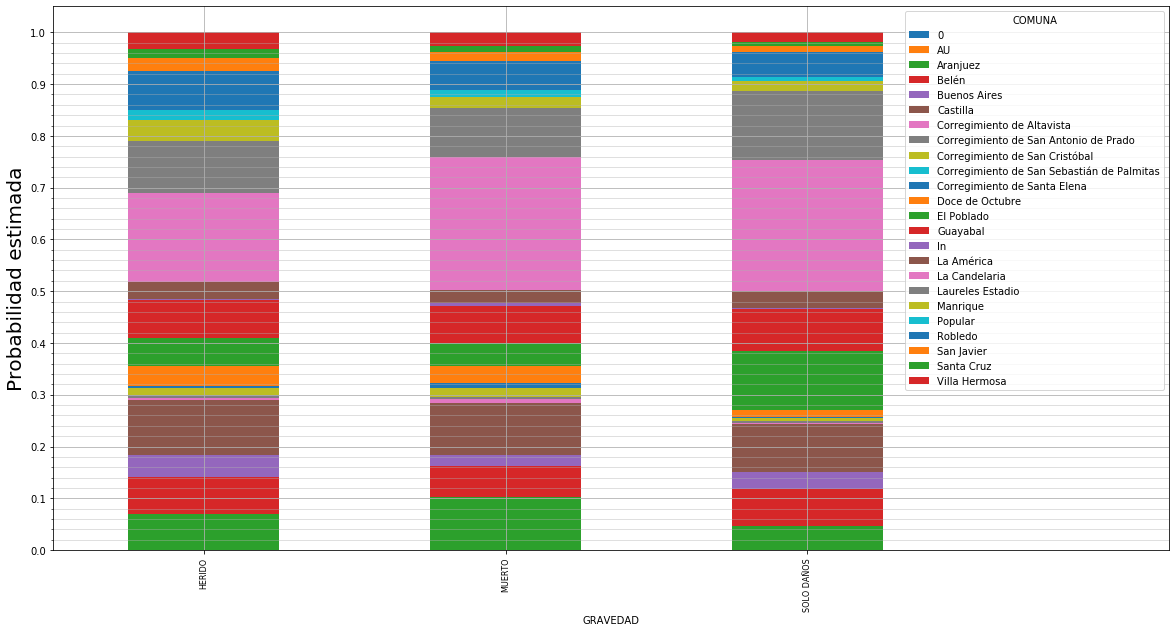

In [91]:
df3 = df.groupby("GRAVEDAD")['COMUNA'].value_counts().unstack(level=1)
df3 = df3.fillna(0.)
df3['sum'] = df3.iloc[0:,:].sum(axis=1)
df3 = df3.iloc[0:,:-1].div(df3['sum'],axis=0)

plt.rcParams["figure.figsize"] = [20, 10] ## Global change because do not work locally

#my_colors = [ (x/len(df3), 0.5*x/len(df3), 0.5*x/len(df3)) for x in range(len(df3)) ] #
#name = "tab20c"
#cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
#colors = cmap(np.linspace(0, 1, len(df3)*1 ))
#colors = cmap.colors

ax = df3.plot.bar(stacked=True)
grids(ax)
ax.set_xlim([-0.5,3.2])

df3 = df3.iloc[0:,:]*100 
df3

plt.savefig("gravedad_comuna2.png")

# Days  in which the accidents happen

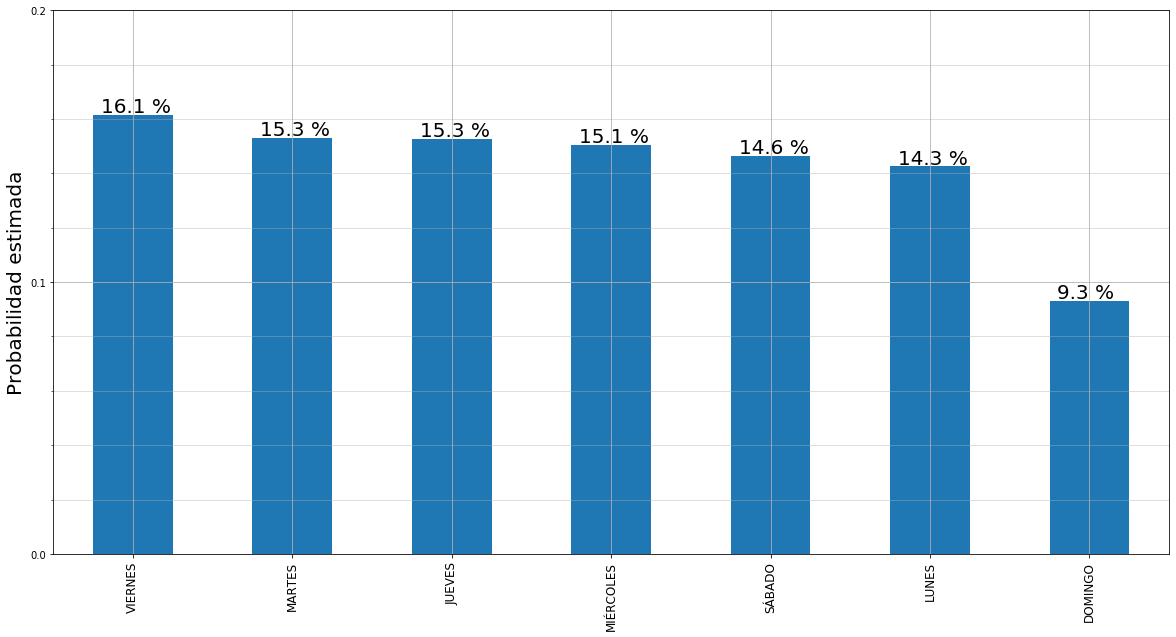

In [56]:
###### Figure declaration
fig = plt.figure(figsize=(20,10))

## Calculating values
df1 = df['DIA'].value_counts()/(n_columns) 

### Doing plot
ax = df1.plot(kind= "bar")
grids(ax)
df1 = df1*100

###### Vizualize the results for incendios
pd.options.display.float_format = '{:,.2e}%'.format

###### Set the percent values for better vizualization
ax.set_ylim([0,0.2])
for i in range( len(df1) ):
    ax.text(-0.2 + 1*i, df1[i]/100+0.001, "%.1f"%(df1[i])+' %' , fontsize=20)

plt.rc('xtick',labelsize=12) 
ax.set_ylabel("Probabilidad estimada", fontsize=20)    
plt.savefig("Dia.png")

GRAVEDAD,HERIDO,MUERTO,SOLO DAÑOS
DIA,,,
DOMINGO,6.47e+01%,1.00e+00%,3.43e+01%
JUEVES,5.64e+01%,2.75e-01%,4.34e+01%
LUNES,5.65e+01%,8.18e-01%,4.27e+01%
MARTES,5.32e+01%,3.97e-01%,4.64e+01%
MIÉRCOLES,5.47e+01%,4.03e-01%,4.49e+01%
SÁBADO,5.67e+01%,6.69e-01%,4.26e+01%
VIERNES,5.34e+01%,4.77e-01%,4.61e+01%


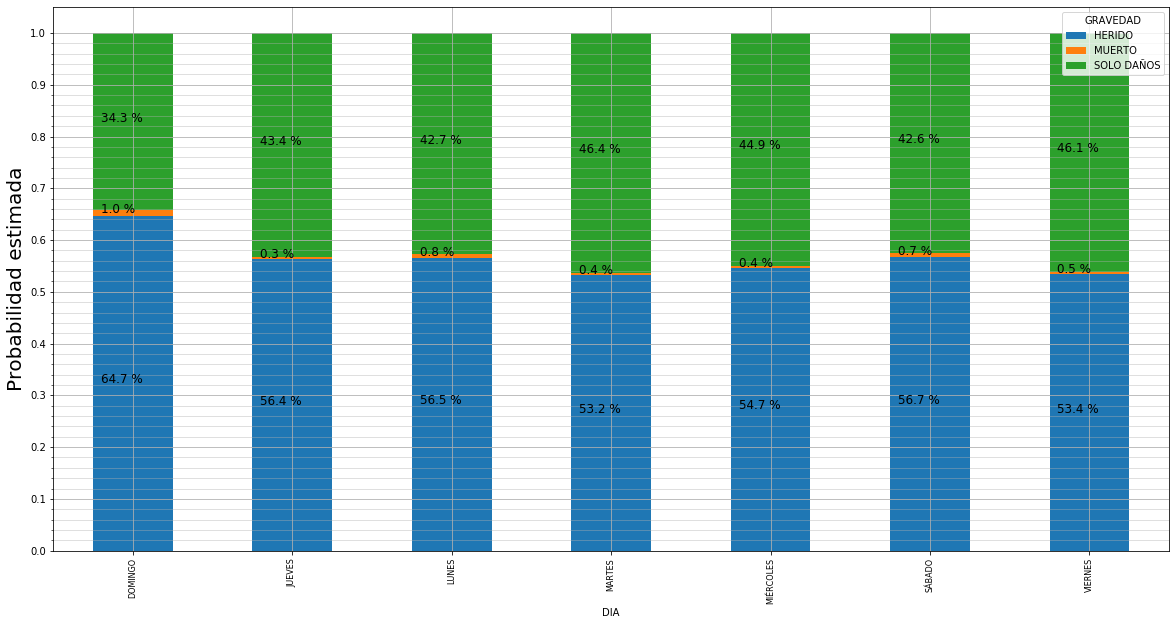

In [81]:
df3 = df.groupby("DIA")['GRAVEDAD'].value_counts().unstack(level=1)
df3 = df3.fillna(0.)
df3['sum'] = df3.iloc[0:,:].sum(axis=1)
df3 = df3.iloc[0:,:-1].div(df3['sum'],axis=0)

plt.rcParams["figure.figsize"] = [20, 10] ## Global change because do not work locally

#my_colors = [ (x/len(df3), 0.5*x/len(df3), 0.5*x/len(df3)) for x in range(len(df3)) ] #
#name = "tab20c"
#cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
#colors = cmap(np.linspace(0, 1, len(df3)*1 ))
#colors = cmap.colors

ax = df3.plot.bar(stacked=True)
grids(ax)
#ax.set_xlim([-1,6])

df3 = df3.iloc[0:,:]*100 


df3_copy = df3.iloc[0:,:].cumsum(axis = 1)
df3_copy.insert( 0,"null",[0]*len(df3) ) 


for i in range( len(df3_copy) ):
    for j in range(3):
        ax.text(-0.2 + 1*i, (df3_copy.iloc[i][j]+df3_copy.iloc[i][j+1])/200, "%.1f"%( df3.iloc[i][j] )+' %' , fontsize=12)


plt.savefig("gravedad_dia.png")
        
df3

DIA,DOMINGO,JUEVES,LUNES,MARTES,MIÉRCOLES,SÁBADO,VIERNES
GRAVEDAD,,,,,,,
HERIDO,1.08e+01%,1.54e+01%,1.44e+01%,1.45e+01%,1.47e+01%,1.48e+01%,1.54e+01%
MUERTO,1.70e+01%,7.66e+00%,2.13e+01%,1.11e+01%,1.11e+01%,1.79e+01%,1.40e+01%
SOLO DAÑOS,7.34e+00%,1.52e+01%,1.40e+01%,1.63e+01%,1.56e+01%,1.44e+01%,1.71e+01%


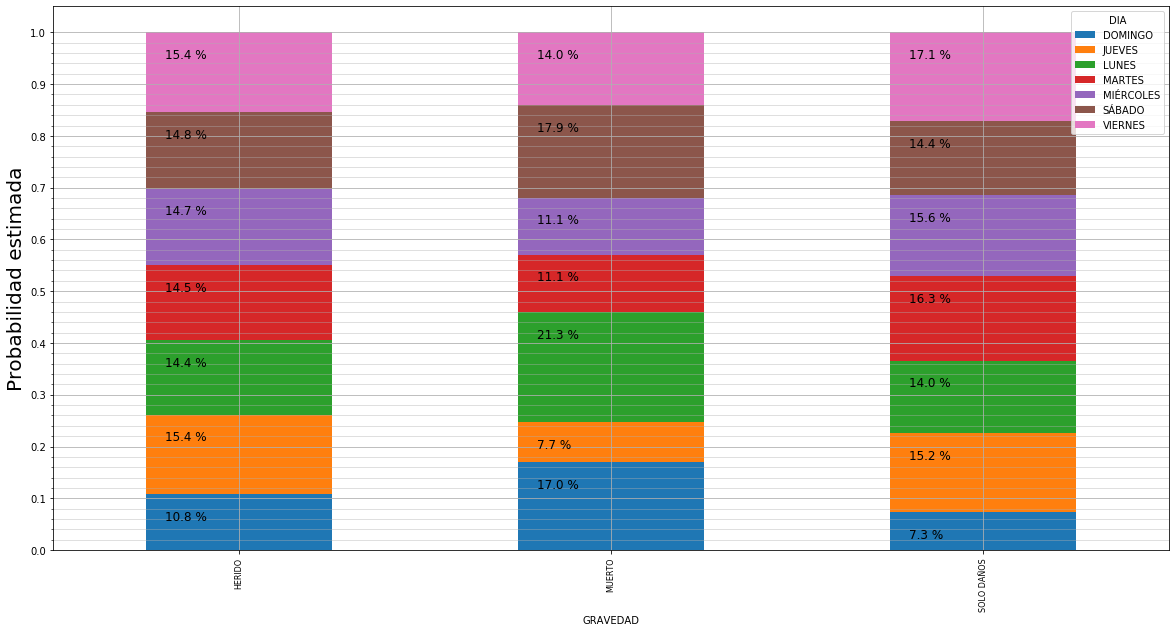

In [82]:
df3 = df.groupby("GRAVEDAD")['DIA'].value_counts().unstack(level=1)
df3 = df3.fillna(0.)
df3['sum'] = df3.iloc[0:,:].sum(axis=1)
df3 = df3.iloc[0:,:-1].div(df3['sum'],axis=0)

plt.rcParams["figure.figsize"] = [20, 10] ## Global change because do not work locally

#my_colors = [ (x/len(df3), 0.5*x/len(df3), 0.5*x/len(df3)) for x in range(len(df3)) ] #
#name = "tab20c"
#cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
#colors = cmap(np.linspace(0, 1, len(df3)*1 ))
#colors = cmap.colors

ax = df3.plot.bar(stacked=True)
grids(ax)
#ax.set_xlim([-1,6])

df3 = df3.iloc[0:,:]*100 


#df3 = df3.iloc[0:1,:].apply(pd.Series)

df3_copy = df3.iloc[0:,:].cumsum(axis = 1)


for i in range( len(df3_copy) ):
    for j in range(7):
        ax.text(-0.2 + 1*i, df3_copy.iloc[i][j]/100-0.05, "%.1f"%( df3.iloc[i][j] )+' %' , fontsize=12)
        



plt.savefig("gravedad_dia2.png")  
df3

# Accidentes en el tiempo

In [119]:
df1 = df['FECHA']
time = np.ones( len(df) ) ## in days 
year_i = float( df1[0][0:4] )
m_days = np.cumsum([0.,31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.])

for i in range (0,len(df)):
    year = float( df1[i][0:4] )
    month = int( df1[i][5:7] )
    day = float( df1[i][8:10] )
    time[i] = ( year-year_i )*365.25 + m_days[month] + day

## This is neccesary because records are combined and  are not in chronological order
time = sorted(time)
    


[-4213.49841695   118.74876156] [[ 4.64962039e+00 -1.74729877e-02]
 [-1.74729877e-02  8.09415347e-05]]


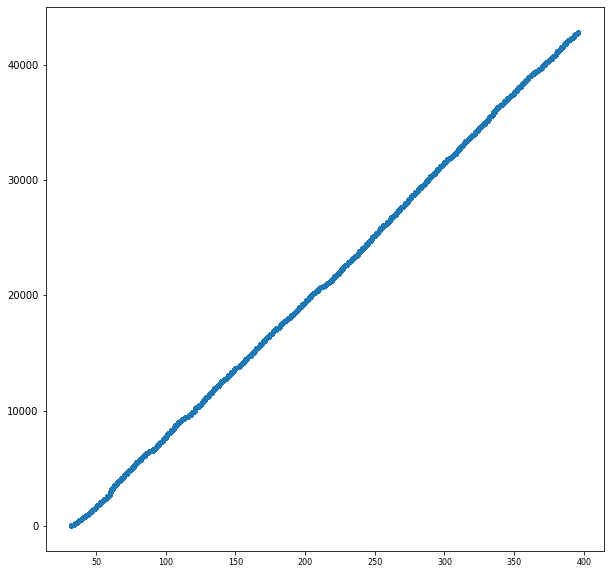

In [120]:
def power_law(x,b,m):
    return  x*m + b

number_accidents = np.arange(1, len(df)+0.5 , 1) 
plt.plot(time, number_accidents,'.')
popt, pcov = curve_fit(power_law, time, number_accidents)
print(popt, pcov)

# Un análisis de PCA para esta relación


Explained variance and components
[1.52960351e+08 2.66561951e+00]
-0.00841877202219347 -0.9999645615108759
0.9999645615108759 -0.00841877202219347


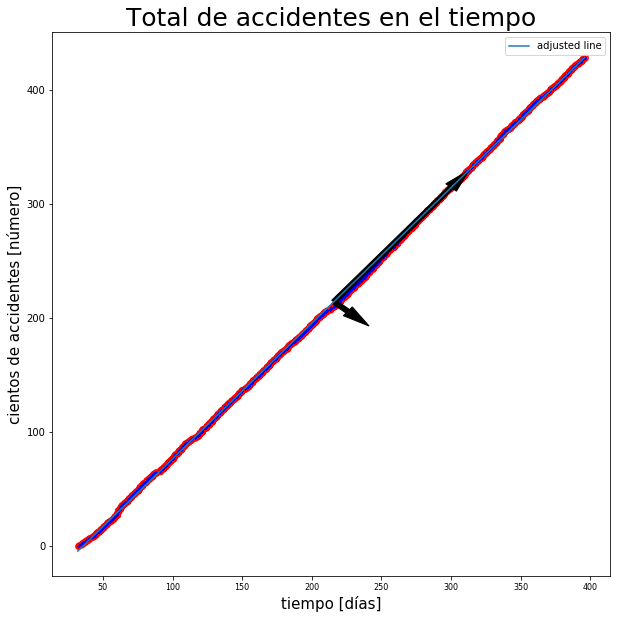

In [131]:
#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

X = np.array([time, number_accidents])
X = X.transpose()

"""
pca = PCA().fit(X)
percent_good = np.cumsum(pca.explained_variance_ratio_) 
plt.plot(percent_good,".-")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
#plt.ylim(0.9999,1.0001)
plt.show()
"""


pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1]/100,c='r',alpha=0.01)
plt.scatter(X_new[:, 0], X_new[:, 1]/100, s=0.1,c='b', alpha=0.8)
print ("Explained variance and components")
#print (pca.explained_variance_)
#print (pca.components_)

plt.rcParams["figure.figsize"] = [10, 10] ## Global change because do not work locally

vmean = pca.mean_
v = pca.components_
### To draw the component

print (v[0][0],v[0][1])
print (v[1][0],v[1][1])

plt.arrow(vmean[0] ,vmean[1]/100, v[1][0]*1000/100 ,v[1][1]*1000, head_width=10, 
        head_length=20, width= 4,  fc='k', ec='k')

plt.arrow(vmean[0] ,vmean[1]/100, -v[0][0]*10000 ,-v[0][1]*10000/100,head_width=10, 
        head_length=20, width= 4,  fc='k', ec='k')


#plt.arrow(vmean[0] ,vmean[1], -v[0][1]*10000 ,-v[0][0]*10000,head_width=10, 
#        head_length=2000, width= 4,  fc='k', ec='k')
#plt.axis('equal')

plt.title("Total de accidentes en el tiempo", fontsize=25)
plt.xlabel("tiempo [días]", fontsize=15)
plt.ylabel("cientos de accidentes [número]", fontsize=15)
plt.plot(time,  popt[0]/100 + popt[1]*np.array(time)/100, label = "adjusted line")
plt.legend(loc=0, fontsize=10)

plt.savefig("accidents_time.png")



In [ ]:
#df.groupby(["CLASE", "GRAVEDAD"]).size()
#.plot(kind = 'bar', stacked=True)
#df.pivot(index='CLASE', columns='GRAVEDAD', values = 'X')
#df2.pivot_table(index='CLASE', columns='GRAVEDAD', )
#.descrive
"""
ax = df1.plot(kind= "bar")
minor_ticks = np.linspace(0, 1, 51)
major_ticks = np.linspace(0, 1, 11)

ax.set_yticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.7)
"""

fig = plt.figure(figsize=(10,10))
df.groupby("CLASE")['GRAVEDAD'].value_counts().unstack(level=1)#.plot.bar(stacked=True)
df[]
